# 2. Exploratory Data Analysis

### Dataset: HDB resale prices since 2017

In this section we explore our dataset in order to understand our question and the HDB resale market better.

Summary:
1. Exploring categorical variables
2. Exploring numeric variables


In [ ]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
!pip install pygeos
##import relevant libs
import geopandas as gpd
import fiona
from geopandas.tools import sjoin
from shapely.geometry import Point
from fiona.drvsupport import supported_drivers
import pygeos
!pip install contextily

gpd.options.use_pygeos = True
supported_drivers['KML'] = 'rw'
sb.set()

  Using cached pygeos-0.14-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
  Using cached contextily-1.5.2-py3-none-any.whl (17 kB)
  Using cached mercantile-1.2.1-py3-none-any.whl (14 kB)
  Using cached matplotlib-3.7.5-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.2 MB)
  Using cached rasterio-1.3.10-cp38-cp38-manylinux2014_x86_64.whl (21.5 MB)
  Using cached pillow-10.3.0-cp38-cp38-manylinux_2_28_x86_64.whl (4.5 MB)
  Using cached joblib-1.4.0-py3-none-any.whl (301 kB)
  Using cached xyzservices-2024.4.0-py3-none-any.whl (81 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached geopy-2.4.1-py3-none-any.whl (125 kB)
  Using cached geographiclib-2.0-py3-none-any.whl (40 kB)
  Using cached fonttools-4.51.0-cp38-cp38-manylinux_2_17_x86_64.many

In [ ]:
filtered_df = pd.read_csv('filtered_df.csv')
filtered_df["month"] = pd.to_datetime(filtered_df["month"])
filtered_df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaininglease,address,latitude,longitude,storey_midpoint,numerical_month,Distance_from_Centre (km),distance_to_nearest_mrt,distance_to_nearest_mall
0,2017-01-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,1970-01-01 00:00:00.000001979,232000.0,61.33,406 ANG MO KIO AVE 10,1.362005,103.853880,11.0,1,8.237451,940.433589,1024.343762
1,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1970-01-01 00:00:00.000001978,250000.0,60.58,108 ANG MO KIO AVE 4,1.370966,103.838202,2.0,1,9.353331,201.370349,864.215691
2,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1970-01-01 00:00:00.000001980,262000.0,62.42,602 ANG MO KIO AVE 5,1.380709,103.835368,2.0,1,10.474170,491.898968,1558.616517
3,2017-01-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,1970-01-01 00:00:00.000001980,265000.0,62.08,465 ANG MO KIO AVE 10,1.366201,103.857201,5.0,1,8.721599,894.428774,898.970693
4,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1970-01-01 00:00:00.000001980,265000.0,62.42,601 ANG MO KIO AVE 5,1.381041,103.835132,2.0,1,10.515178,462.994532,1603.405761


In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172055 entries, 0 to 172054
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   month                      172055 non-null  datetime64[ns]
 1   town                       172055 non-null  object        
 2   flat_type                  172055 non-null  object        
 3   storey_range               172055 non-null  object        
 4   floor_area_sqm             172055 non-null  float64       
 5   flat_model                 172055 non-null  object        
 6   lease_commence_date        172055 non-null  object        
 7   resale_price               172055 non-null  float64       
 8   remaininglease             172055 non-null  float64       
 9   address                    172055 non-null  object        
 10  latitude                   172055 non-null  float64       
 11  longitude                  172055 non-null  float64 

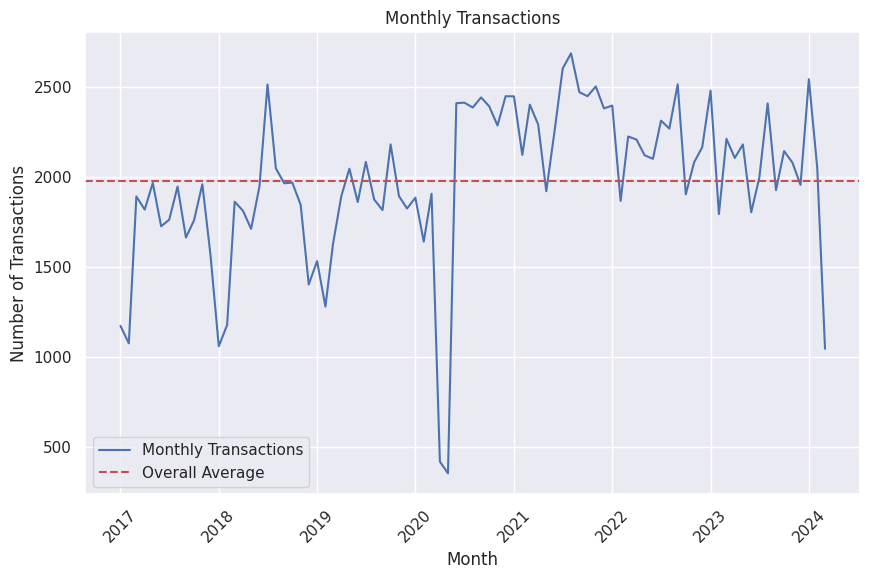

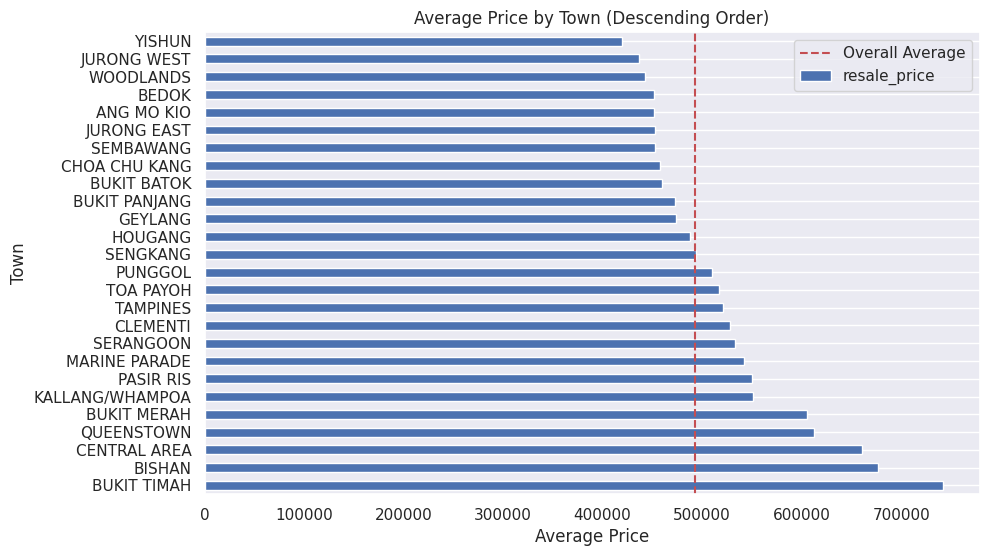

In [ ]:
# Calculate monthly transactions (unique rows)
monthly_transactions = filtered_df.groupby('month').size()


# Plot monthly transactions
# Calculate overall average of transaction counts
overall_avg_transactions = monthly_transactions.mean()

# Plot monthly transactions with average line
plt.figure(figsize=(10, 6))
plt.plot(monthly_transactions.index, monthly_transactions.values, linestyle='-', label='Monthly Transactions')
plt.axhline(y=overall_avg_transactions, color='r', linestyle='--', label='Overall Average')  # Plot average line
plt.title('Monthly Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

price_by_town = filtered_df.groupby('town')['resale_price'].mean()
# Plot bar chart showing price by town
# Sort price_by_town in descending order
avgprice = price_by_town.mean()
price_by_town_sorted = price_by_town.sort_values(ascending=False)

# Calculate overall average price
overall_avg_price = filtered_df['resale_price'].mean()

# Plot horizontal bar chart showing price by town with the custom color palette
ax = price_by_town_sorted.plot(kind='barh', figsize=(10, 6))

# Plot average line
plt.axvline(x=overall_avg_price, color='r', linestyle='--', label='Overall Average')

plt.title('Average Price by Town (Descending Order)')
plt.ylabel('Town')
plt.xlabel('Average Price')
plt.grid(axis='x')
plt.legend()
plt.show()

As an overview, we can see that there are 2000 monthly transactions on average, with an average resale price of 500k. We can also see the towns with the highest and lowest mean prices.

In [ ]:
#Group data into year
aggregated_data = filtered_df.groupby(['month', 'flat_type'])['resale_price'].mean().reset_index()
aggregated_data.head

<bound method NDFrame.head of          month         flat_type  resale_price
0   2017-01-01            2 ROOM  2.425278e+05
1   2017-01-01            3 ROOM  3.187775e+05
2   2017-01-01            4 ROOM  4.308596e+05
3   2017-01-01            5 ROOM  5.161230e+05
4   2017-01-01         EXECUTIVE  6.206539e+05
..         ...               ...           ...
517 2024-03-01            3 ROOM  4.182749e+05
518 2024-03-01            4 ROOM  6.005305e+05
519 2024-03-01            5 ROOM  6.936707e+05
520 2024-03-01         EXECUTIVE  8.553751e+05
521 2024-03-01  MULTI-GENERATION  1.060000e+06

[522 rows x 3 columns]>

In [ ]:
overall = filtered_df.groupby(['month'])['resale_price'].mean().reset_index()
overall.head

<bound method NDFrame.head of         month   resale_price
0  2017-01-01  427289.513629
1  2017-02-01  446446.264624
2  2017-03-01  444484.360211
3  2017-04-01  438400.848154
4  2017-05-01  443357.707317
..        ...            ...
82 2023-11-01  578892.296434
83 2023-12-01  576778.111906
84 2024-01-01  588718.725236
85 2024-02-01  582246.656222
86 2024-03-01  588605.309456

[87 rows x 2 columns]>

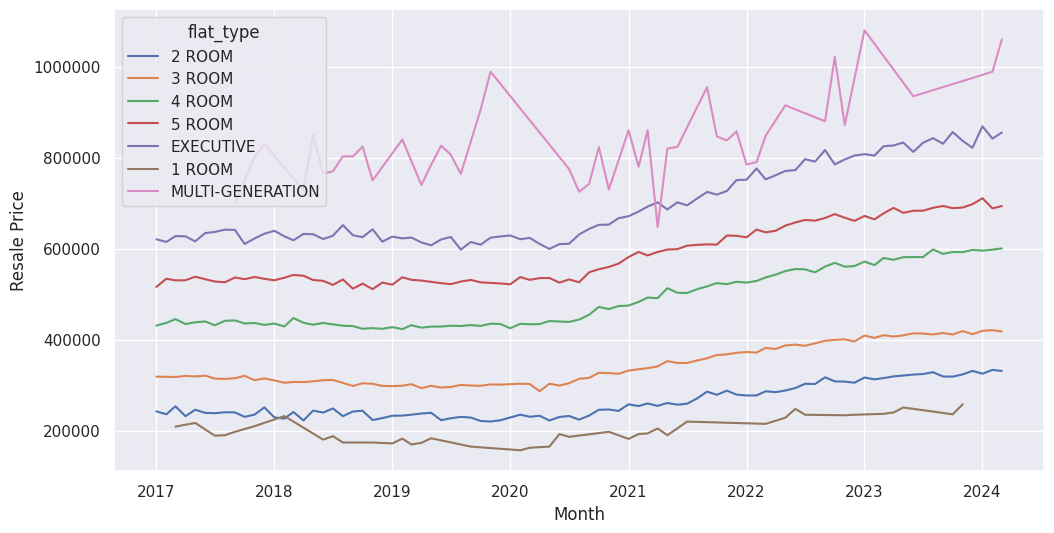

In [ ]:
plt.figure(figsize=(12, 6))
sb.lineplot(data=aggregated_data, x="month", y="resale_price", hue="flat_type")
plt.xlabel('Month')
plt.ylabel('Resale Price')
plt.ticklabel_format(style='plain', axis='y')  # Set y-axis tick labels to non-scientific format
plt.show()

Here we see the changes in mean resale price for the various flat types over time, there is an increasing trend.

# 1. Exploring categorical variables

In [ ]:
filtered_df["flat_type"].value_counts()

flat_type
4 ROOM              72617
5 ROOM              42907
3 ROOM              40844
EXECUTIVE           12511
2 ROOM               3035
MULTI-GENERATION       77
1 ROOM                 64
Name: count, dtype: int64

4 room flats are the most common transactions in the resale market

In [ ]:
filtered_df["flat_model"].value_counts()

flat_model
Model A                   59598
Improved                  42638
New Generation            21603
Premium Apartment         19536
Simplified                 6600
Apartment                  6354
Standard                   4717
Maisonette                 4621
DBSS                       2965
Model A2                   2015
Model A-Maisonette          311
Adjoined flat               306
Type S1                     293
Type S2                     160
Premium Apartment Loft      102
2-room                       84
Multi Generation             77
3Gen                         23
Terrace                      20
Improved-Maisonette          18
Premium Maisonette           14
Name: count, dtype: int64

Model A is the most common flat model sold

In [ ]:
filtered_df["storey_range"].value_counts()

storey_range
04 TO 06    39618
07 TO 09    36261
10 TO 12    32316
01 TO 03    29804
13 TO 15    16495
16 TO 18     7755
19 TO 21     3340
22 TO 24     2399
25 TO 27     1454
28 TO 30      949
31 TO 33      503
34 TO 36      458
37 TO 39      397
40 TO 42      194
43 TO 45       56
46 TO 48       41
49 TO 51       15
Name: count, dtype: int64

most of the flats sold are from floors 4 - 12

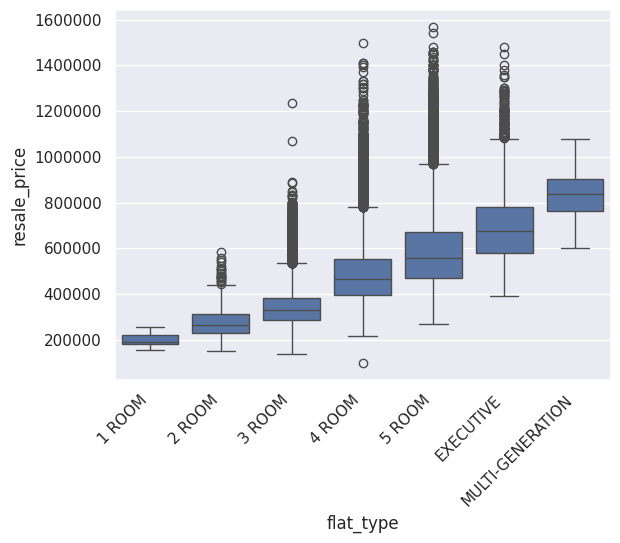

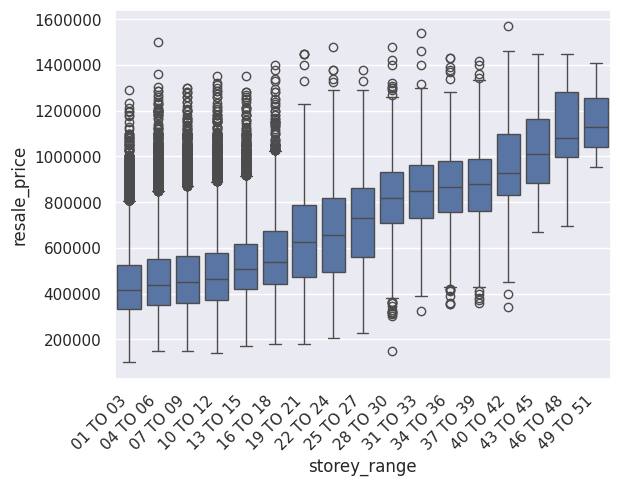

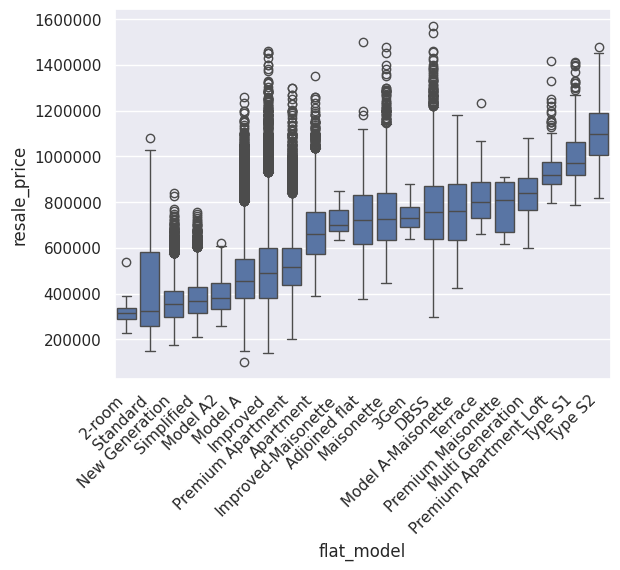

In [ ]:
# Create a DataFrame for plotting
boxplot_df = pd.DataFrame(filtered_df[['flat_type', 'storey_range', 'flat_model', 'resale_price']])

# Define the order of categories for each variable
flat_type_order = sorted(boxplot_df['flat_type'].unique())
storey_range_order = sorted(boxplot_df['storey_range'].unique())
# Calculate median resale price for each flat model
median_prices = boxplot_df.groupby('flat_model')['resale_price'].median()

# Sort flat models based on median resale price
flat_model_order = median_prices.sort_values().index.tolist()

# Loop over each variable and create the boxplot
for variable, order in [('flat_type', flat_type_order), ('storey_range', storey_range_order), ('flat_model', flat_model_order)]:
    sb.boxplot(x=variable, y='resale_price', data=boxplot_df, order=order)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(variable)
    plt.ylabel('resale_price')
    plt.gca().ticklabel_format(style='plain', axis='y')
    plt.show()

From the box plots above, we can see that both flat type and storey range have a positive relationship with resale price. Hence, we decided to include another variable numeric room type, which encodes the flat types into numeric values. We can do this since flat type has a natural ordering of rank values, and it is an ordinal variable.

In [ ]:
#From EDA, decide to do this to see relationship
# Dictionary to map room types to numeric values
room_mapping = {
    '4 ROOM': 4,
    '5 ROOM': 5,
    '3 ROOM': 3,
    'EXECUTIVE': 6,  # Assuming EXECUTIVE corresponds to 6
    '2 ROOM': 2,
    'MULTI-GENERATION': 7,  # Assuming MULTI-GENERATION corresponds to 7
    '1 ROOM': 1
}

# Function to map room types to numeric values
def map_room_type(room_type):
    return room_mapping.get(room_type)

# Create a new column with numeric values
filtered_df['numeric_room_type'] = filtered_df['flat_type'].apply(map_room_type)

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172055 entries, 0 to 172054
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   month                      172055 non-null  datetime64[ns]
 1   town                       172055 non-null  object        
 2   flat_type                  172055 non-null  object        
 3   storey_range               172055 non-null  object        
 4   floor_area_sqm             172055 non-null  float64       
 5   flat_model                 172055 non-null  object        
 6   lease_commence_date        172055 non-null  object        
 7   resale_price               172055 non-null  float64       
 8   remaininglease             172055 non-null  float64       
 9   address                    172055 non-null  object        
 10  latitude                   172055 non-null  float64       
 11  longitude                  172055 non-null  float64 

In order to see the relationship between flat model and resale price, we have also decided to do one hot encoding such that these can be factored in our regression models

In [ ]:
 #trying one hot encode to capture effects of flat model
 # Assuming filtered_df is your DataFrame containing the flat_model column
# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(filtered_df['flat_model'], prefix='flat_model')

# Concatenate the one-hot encoded columns with the original DataFrame
ohe_df = pd.concat([filtered_df, one_hot_encoded], axis=1)

# Drop the original flat_model column if needed
# filtered_df_encoded.drop('flat_model', axis=1, inplace=True)

# Display the DataFrame with one-hot encoded columns
ohe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172055 entries, 0 to 172054
Data columns (total 39 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   month                              172055 non-null  datetime64[ns]
 1   town                               172055 non-null  object        
 2   flat_type                          172055 non-null  object        
 3   storey_range                       172055 non-null  object        
 4   floor_area_sqm                     172055 non-null  float64       
 5   flat_model                         172055 non-null  object        
 6   lease_commence_date                172055 non-null  object        
 7   resale_price                       172055 non-null  float64       
 8   remaininglease                     172055 non-null  float64       
 9   address                            172055 non-null  object        
 10  latitude            

In [ ]:
ohe_df.to_csv('testohedf.csv', index=False)

## 2. Exploring numeric variables

Overview of numeric variables

In [ ]:
filtered_df.describe()

,floor_area_sqm,resale_price,remaininglease,latitude,longitude,storey_midpoint,numerical_month,Distance_from_Centre (km),distance_to_nearest_mrt,distance_to_nearest_mall,numeric_room_type
count,172055.000000,1.720550e+05,172055.000000,172055.000000,172055.000000,172055.000000,172055.000000,172055.000000,172055.000000,172055.000000,172055.000000
mean,97.046154,4.929854e+05,74.560077,1.367785,103.842021,8.797396,46.256825,12.076430,614.543570,666.077294,4.122368
std,23.915713,1.708248e+05,13.862876,0.042903,0.070937,5.952782,24.426315,4.367927,383.915407,379.877816,0.916839
min,31.000000,1.000000e+05,41.750000,1.270380,103.685228,2.000000,1.000000,0.722439,22.111978,0.000709,1.000000
25%,82.000000,3.680000e+05,63.250000,1.336990,103.783524,5.000000,25.000000,9.317532,320.357137,384.996986,3.000000
50%,93.000000,4.620000e+05,74.580000,1.367695,103.847102,8.000000,48.000000,12.995027,538.423174,592.326452,4.000000
75%,112.000000,5.850000e+05,87.670000,1.396324,103.899291,11.000000,67.000000,15.107650,818.031097,873.941721,5.000000
max,243.000000,1.568888e+06,97.750000,1.457071,103.987804,50.000000,87.000000,19.841848,3523.426973,3237.946237,7.000000


<AxesSubplot: xlabel='distance_to_nearest_mall'>

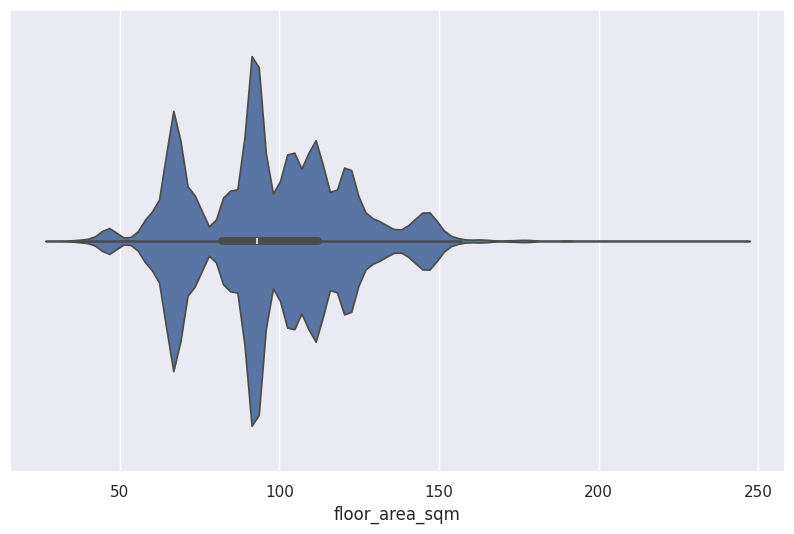

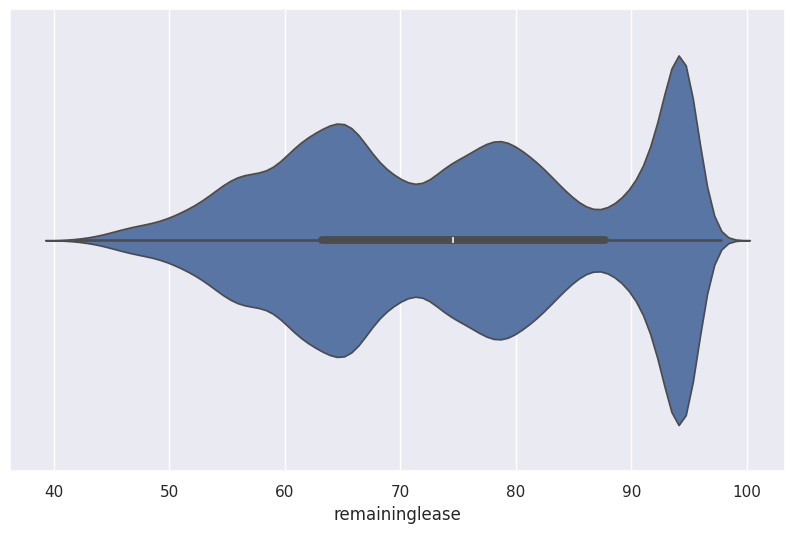

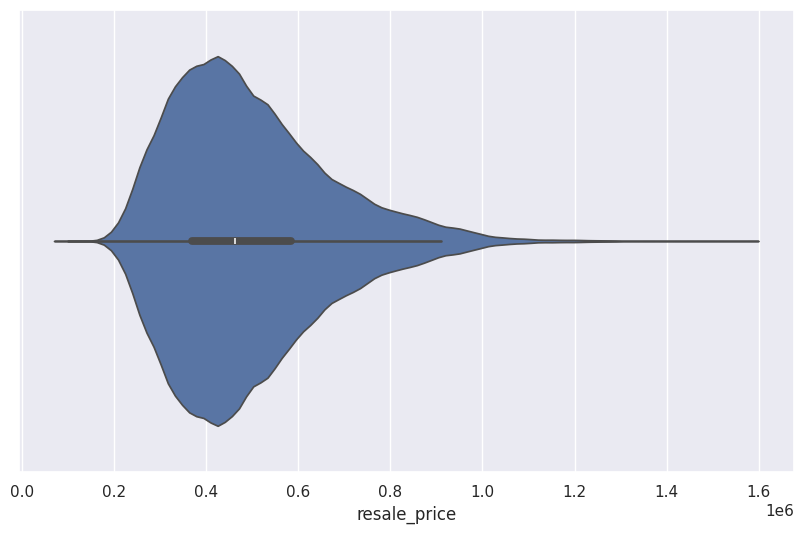

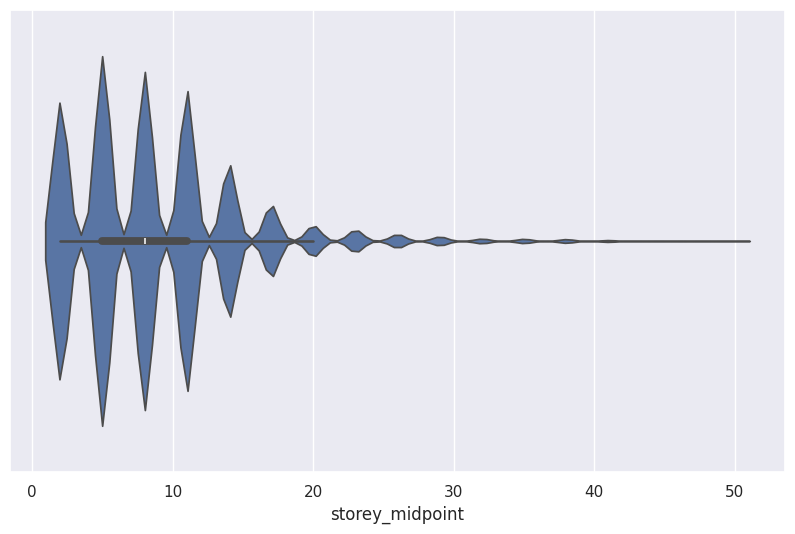

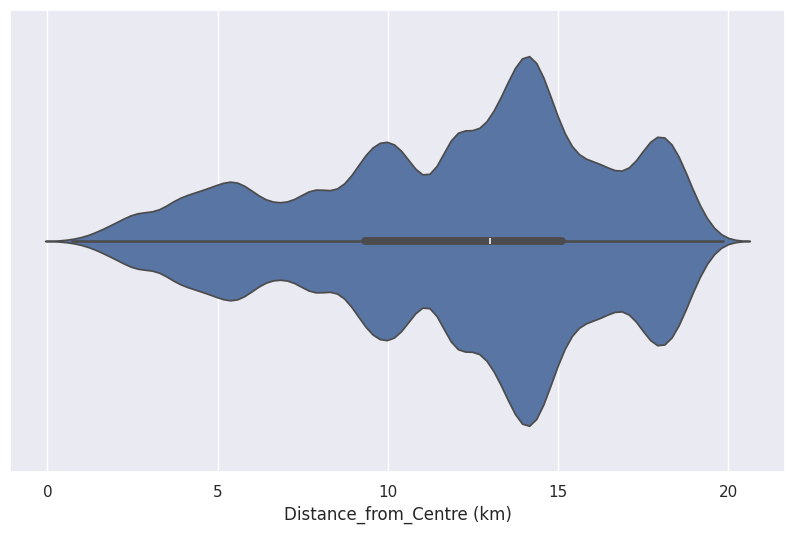

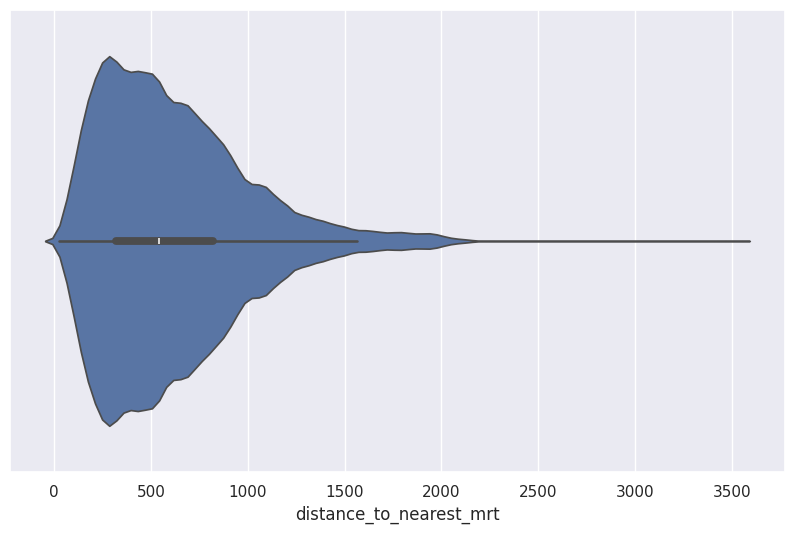

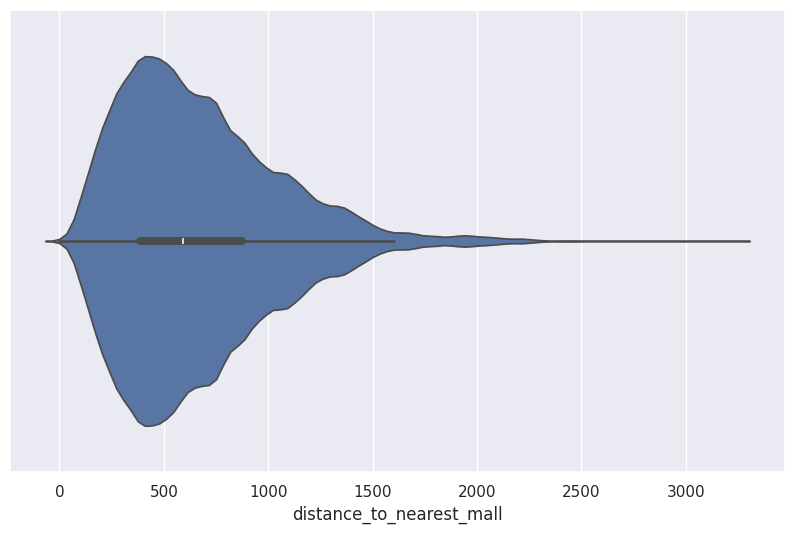

In [ ]:
f = plt.figure(figsize=(10,6))
sb.violinplot(data = filtered_df['floor_area_sqm'], orient = "h")

f = plt.figure(figsize=(10,6 ))
sb.violinplot(data = filtered_df['remaininglease'], orient = "h")

f = plt.figure(figsize=(10,6))
sb.violinplot(data = filtered_df['resale_price'], orient = "h")

f = plt.figure(figsize=(10,6))
sb.violinplot(data = filtered_df['storey_midpoint'], orient = "h")

f = plt.figure(figsize=(10,6))
sb.violinplot(data = filtered_df['Distance_from_Centre (km)'], orient = "h")

f = plt.figure(figsize=(10,6))
sb.violinplot(data = filtered_df['distance_to_nearest_mrt'], orient = "h")
f = plt.figure(figsize=(10,6))
sb.violinplot(data = filtered_df['distance_to_nearest_mall'], orient = "h")


floor area sqm : peaks at both 65 and 90 sqm, which suggests that these sizes might be more popular/standard

3 peaks for remaininglease: at about 95y, many sell right after the MOP, at around 78 and 65 years there are peaks as well

median resale price around 420k

Perhaps due to the high connectivity/public transport system in Singapore, flats on average are 600m from the nearest MRT

In terms of amenities, they are also around 600m to the nearest mall

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'resale_price'),
  Text(1.5, 0, 'floor_area_sqm'),
  Text(2.5, 0, 'remaininglease'),
  Text(3.5, 0, 'storey_midpoint'),
  Text(4.5, 0, 'numerical_month'),
  Text(5.5, 0, 'latitude'),
  Text(6.5, 0, 'longitude'),
  Text(7.5, 0, 'Distance_from_Centre (km)'),
  Text(8.5, 0, 'distance_to_nearest_mrt'),
  Text(9.5, 0, 'distance_to_nearest_mall')])

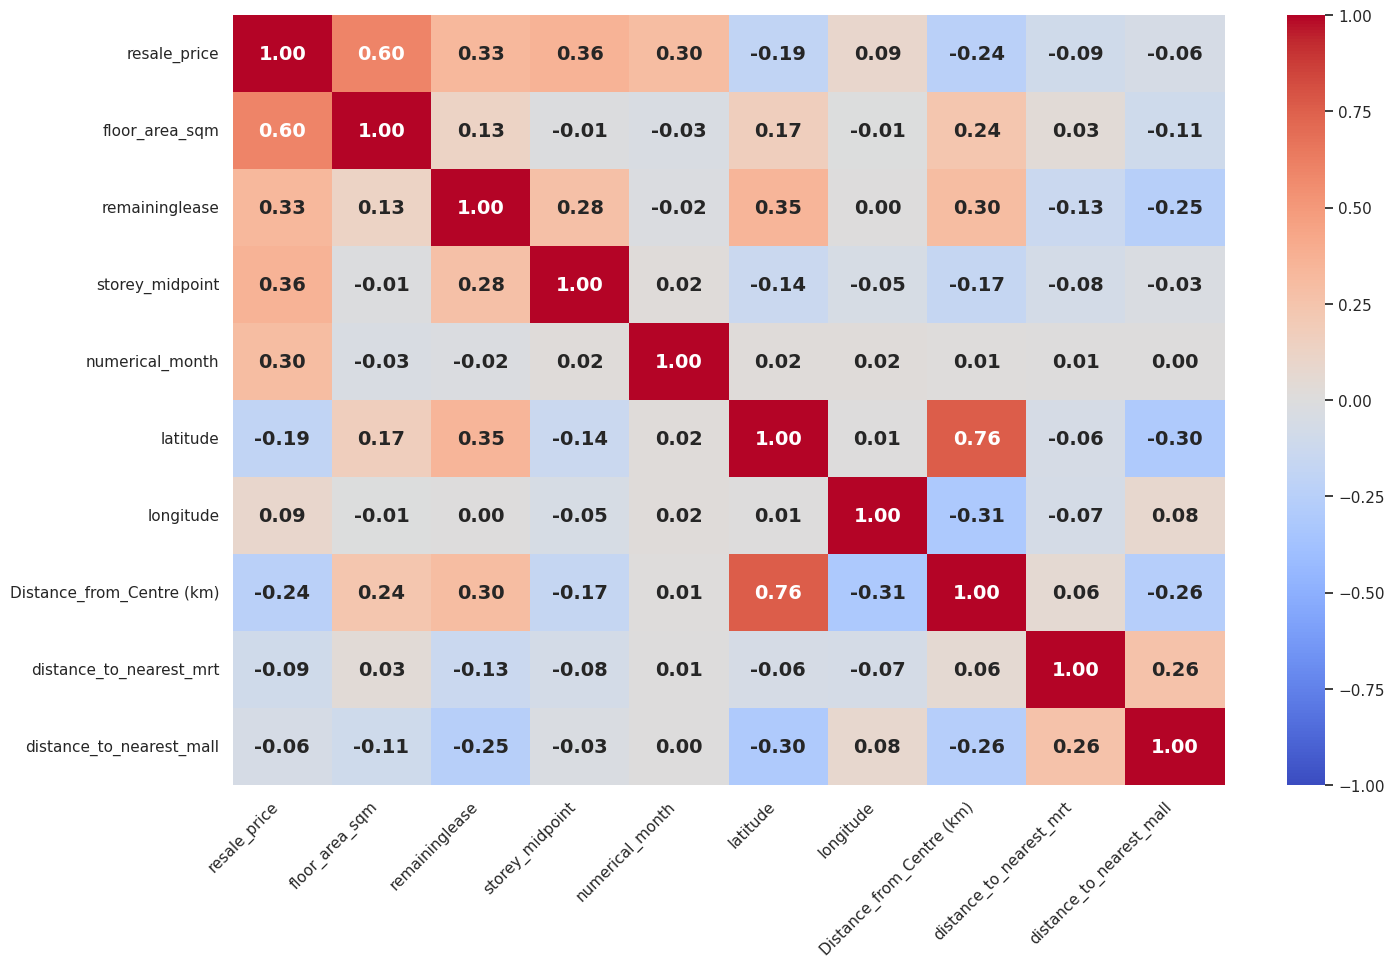

In [ ]:
corr_df = pd.DataFrame(filtered_df[['resale_price','floor_area_sqm', 'remaininglease','storey_midpoint','numerical_month', 'latitude', 'longitude','Distance_from_Centre (km)','distance_to_nearest_mrt','distance_to_nearest_mall']])
corr_df.head()
plt.figure(figsize=(16, 10)) 

corr_df.corr()
sb.heatmap(corr_df.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", cmap= 'coolwarm', annot_kws={"size": 14, "weight": "bold"})
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
#plt.figure(figsize=(20, 20)) 



We can see that variables with the positive correlation to resale price are floor area, remaining lease, storey, months from base month

Variables with negative correlation to resale price are the distances to city centre, nearest mrt and mall.

numeric room type and floor area might have collinearity 

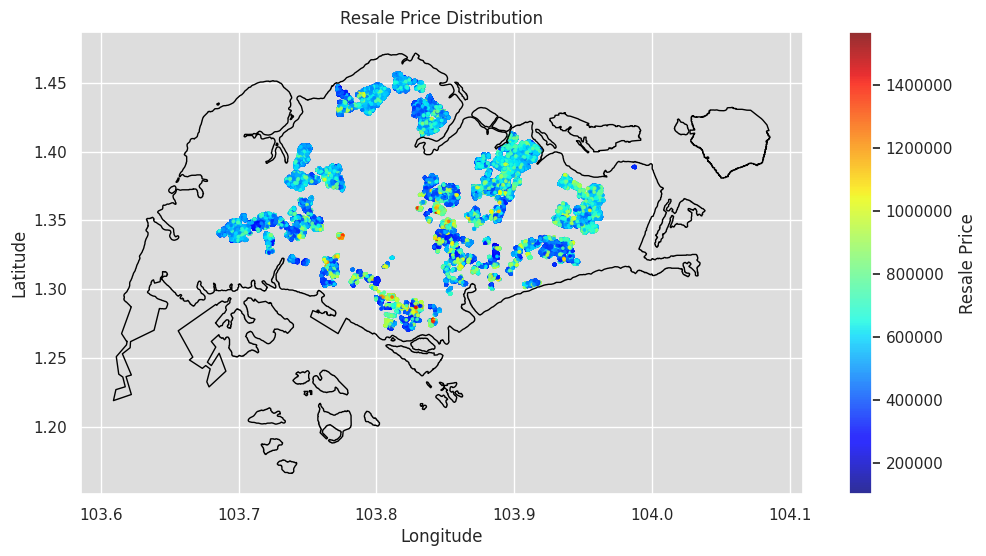

In [ ]:

from matplotlib.colors import Normalize
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker



gdf = gpd.GeoDataFrame(filtered_df, geometry=gpd.points_from_xy(filtered_df.longitude, filtered_df.latitude))
gdf.crs = 'EPSG:4326'  # Set CRS to WGS84



# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(gdf.geometry.x, gdf.geometry.y, c=gdf['resale_price'], s= 3, cmap='jet', alpha=0.8)

# Create colorbar with a fixed format
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Resale Price')

# Format colorbar to show large numbers without scientific notation
cbar.formatter.set_scientific(False)
cbar.formatter.set_useOffset(False)
cbar.update_ticks()


# Load the shapefile containing the outline of Singapore
singapore_outline = gpd.read_file("/work/SGP_adm0.shp")


# Plot the outline of Singapore
singapore_outline.plot(ax=ax, color='none', edgecolor='black')


ax.set_facecolor('#DDDDDD')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Resale Price Distribution')
plt.show()


On the above, we visualise the data points on the Singapore map, with colours representing resale price.

In [ ]:
filtered_df.to_csv('alldf.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d45d76c1-fda9-4cb4-b314-47c76fd050a8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>